In [28]:
# the key idea is that instead of doing L2 training we do sobolev training ! 

# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.3'
#       jupytext_version: 1.17.2
#   kernelspec:
#     display_name: .venv
#     language: python
#     name: python3
# ---

In [29]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sciml.data.preprocessing.process_given_dataset import get_mu_xs_sol

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [30]:
d_p = 20
d_V = 20
epochs = 10

In [31]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(100,)),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(512, activation='elu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(1,)),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(512, activation='elu'),
])

coeff = tf.constant([-0.01,0.2,0],dtype=tf.float32)
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"pinn_order":2,"pinn_coeff": coeff,"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs},folder_path="/home/janis/SCIML/summerschool/data/benchmarks/given/")

2025-08-05 20:21:47,663 - sciml.model.deeponet.deeponet - INFO - Model initialized with 10 epochs, 32 batch size, 0.001 learning rate


In [32]:


# now we need to do sobolev training with custom function knowing the PDE

In [33]:
folder_path = "/home/janis/SCIML/summerschool/data/benchmarks/given/"
coeff = tf.constant([-0.01,0.2,0],dtype=tf.float32)

In [34]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"pinn_order":2,"pinn_coeff": coeff,"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs},folder_path="/home/janis/SCIML/summerschool/data/benchmarks/given/")

2025-08-05 20:21:47,700 - sciml.model.deeponet.deeponet - INFO - Model initialized with 10 epochs, 32 batch size, 0.001 learning rate


In [35]:
mus, xs, sol = get_mu_xs_sol(folder_path,0.2)

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


In [36]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(2000, 100)
(2000, 100, 1)
(2000, 100)


mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:21:51,985 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:21:51,988 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.056454
2025-08-05 20:21:51,989 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.052130
Training progress:  10%|█         | 1/10 [00:03<00:33,  3.72s/it]2025-08-05 20:21:55,640 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:21:55,642 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.047569
2025-08-05 20:21:55,643 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.044492
Training progress:  20%|██        | 2/10 [00:07<00:29,  3.68s/it]2025-08-05 20:21:58,261 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-05 20:21:58,263 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.039727
2025-08-05 20:21:58,263 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.042015
Training progress:  30%|███       | 3/10 [00:09<00:22,  3.20s/i

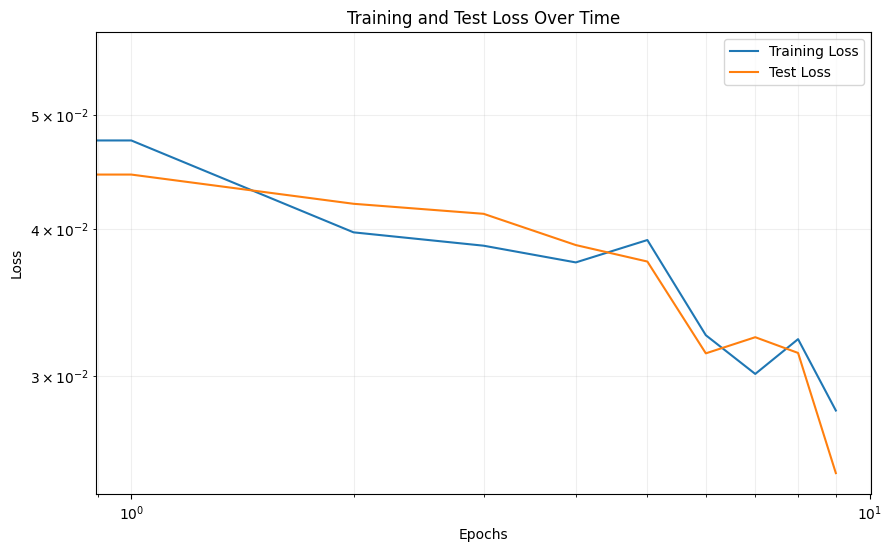

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


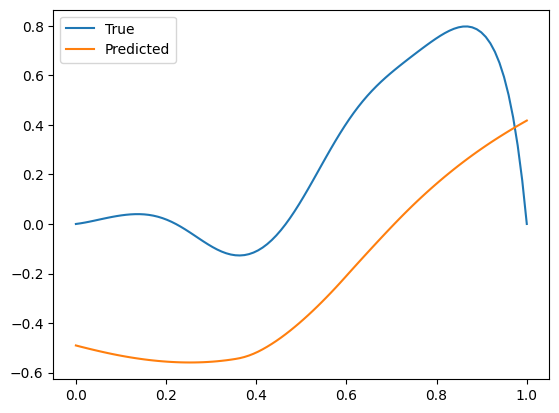

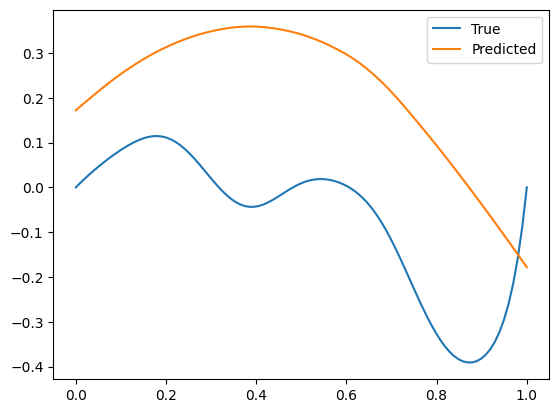

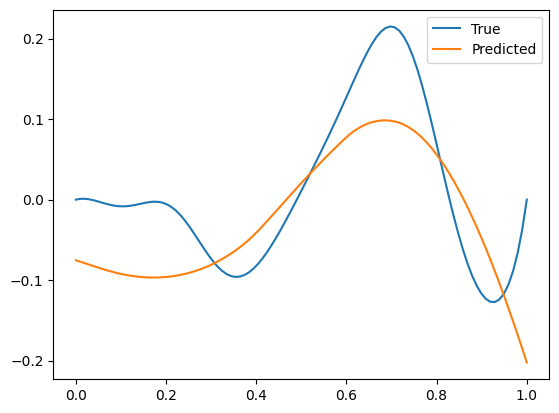

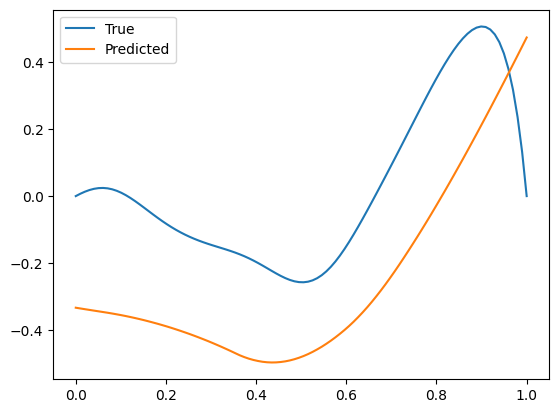

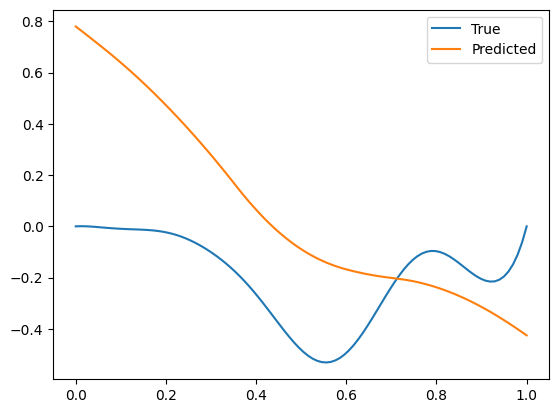

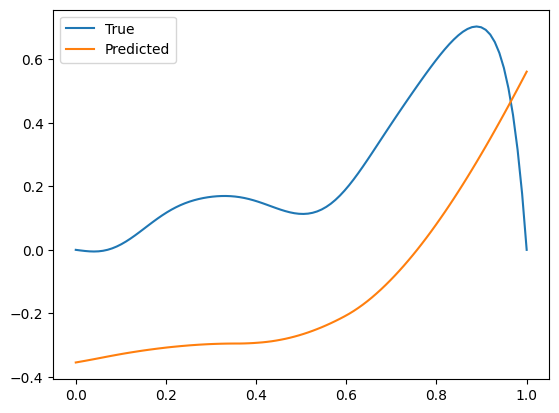

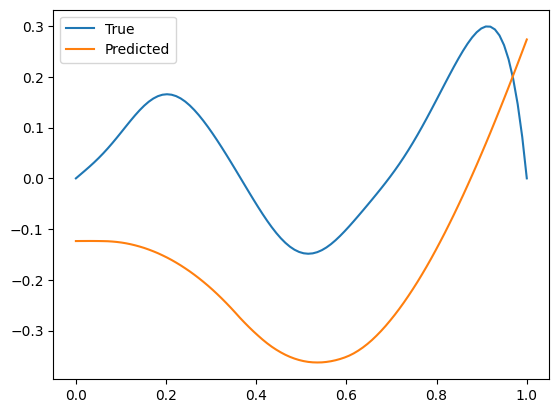

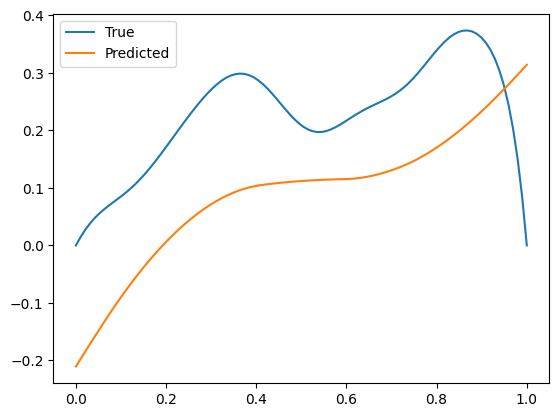

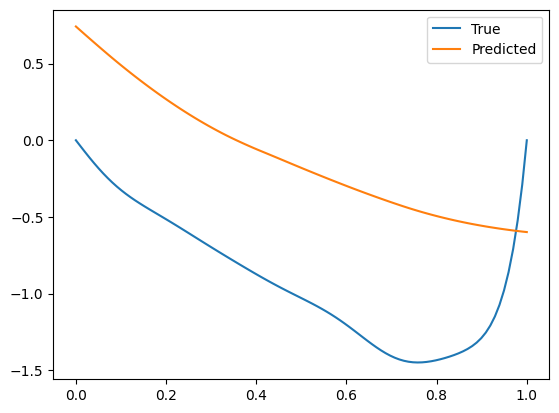

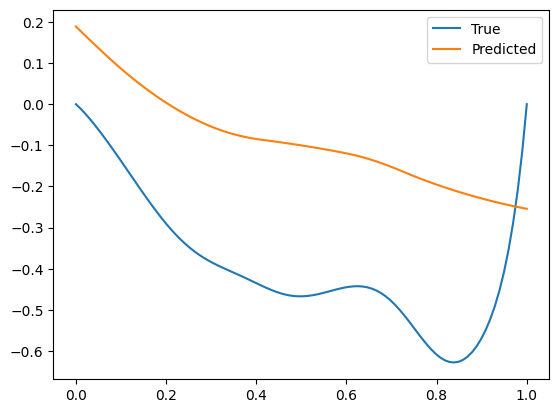

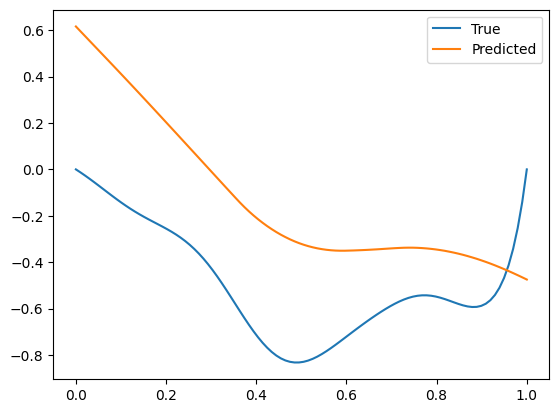

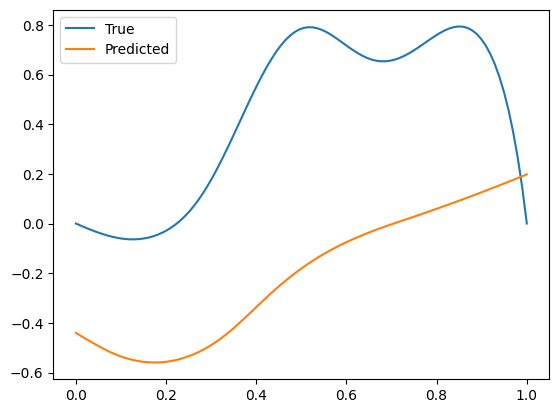

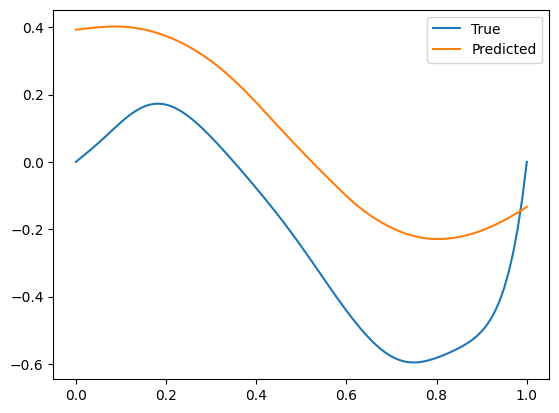

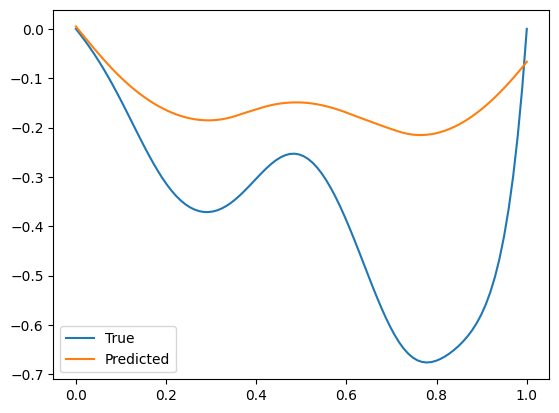

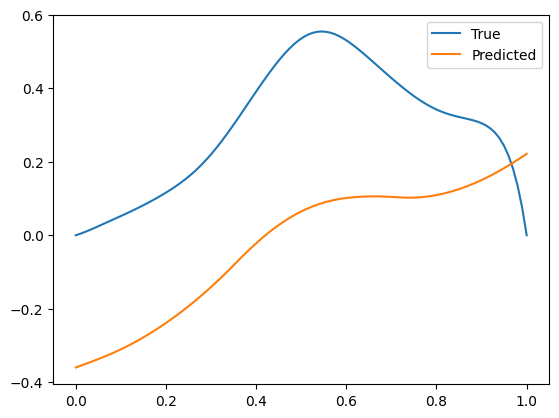

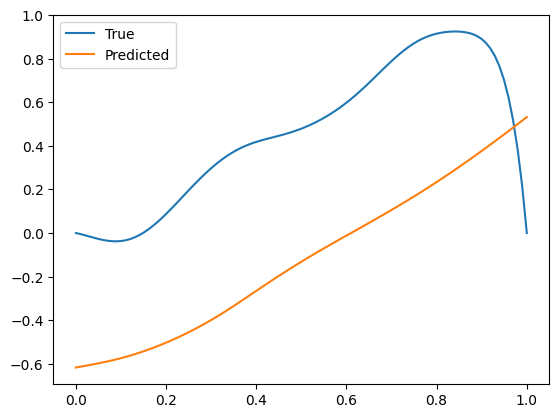

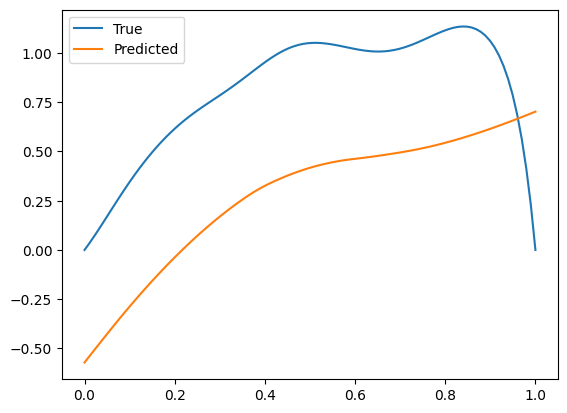

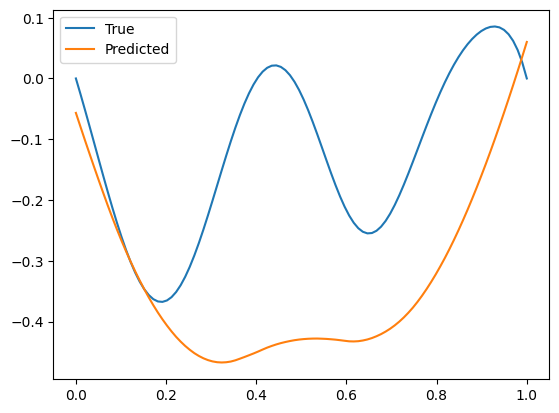

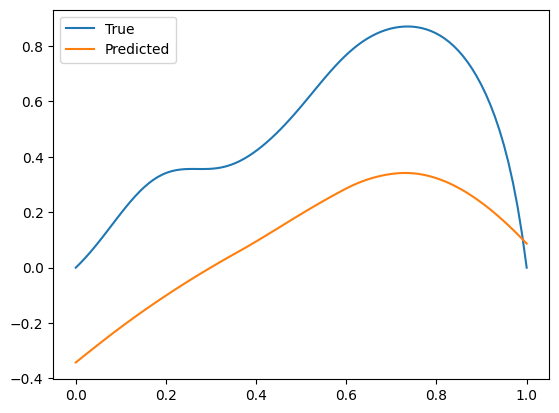

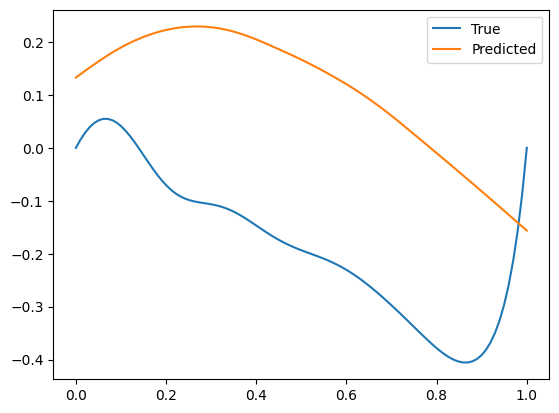

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:22:23,754 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:22:23,755 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.024417
2025-08-05 20:22:23,756 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.024923
Training progress:  10%|█         | 1/10 [00:02<00:25,  2.79s/it]2025-08-05 20:22:29,714 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:22:29,716 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.023117
2025-08-05 20:22:29,717 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.021555
Training progress:  20%|██        | 2/10 [00:08<00:37,  4.65s/it]2025-08-05 20:22:32,430 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-05 20:22:32,431 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.022365
2025-08-05 20:22:32,432 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.023036
Training progress:  30%|███       | 3/10 [00:11<00:26,  3.77s/i

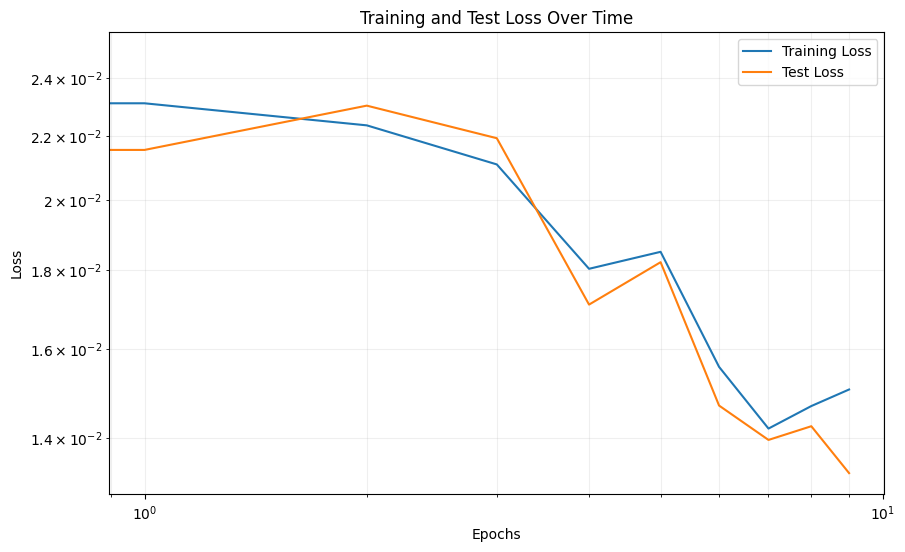

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


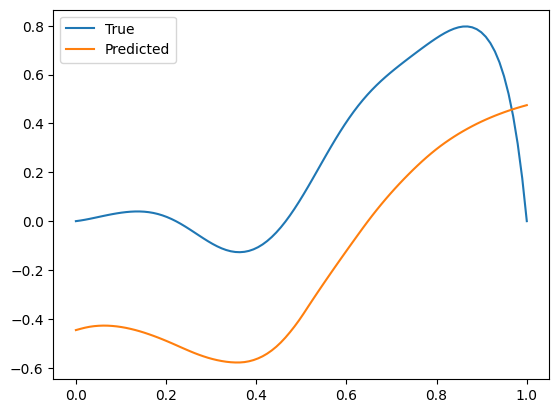

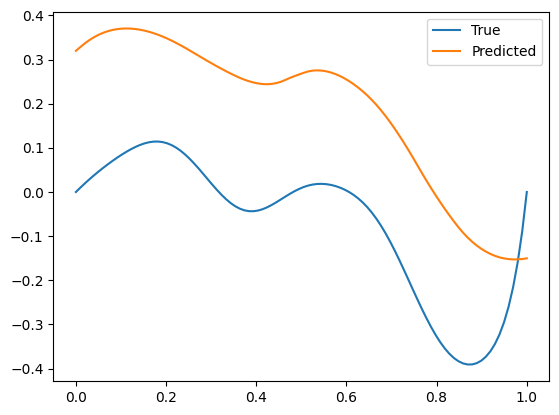

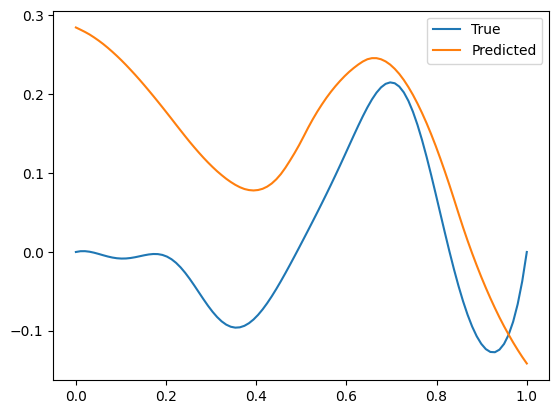

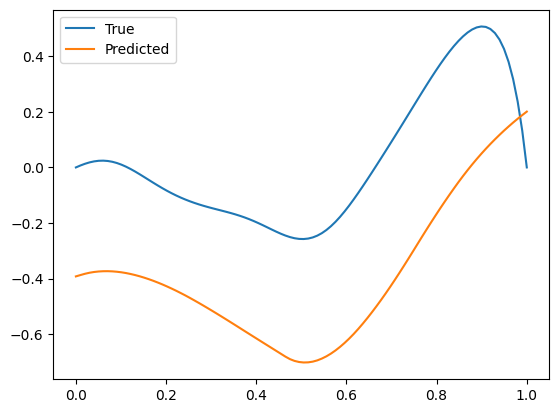

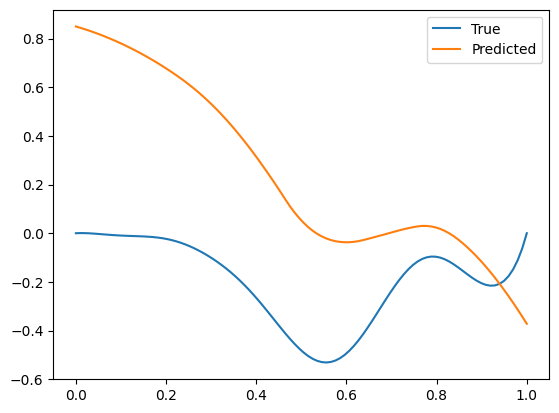

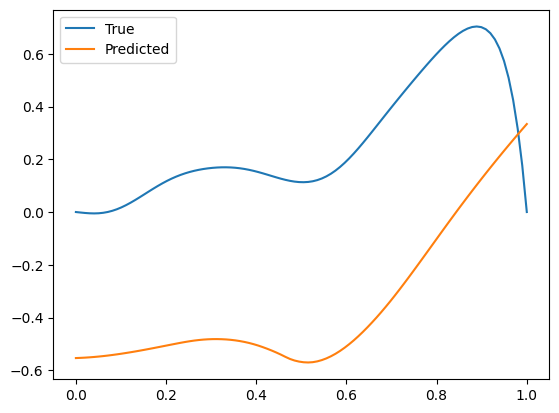

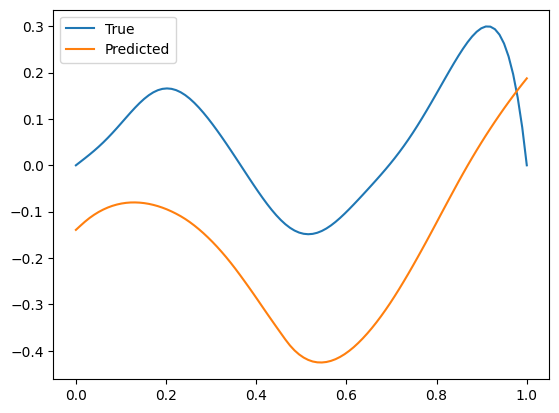

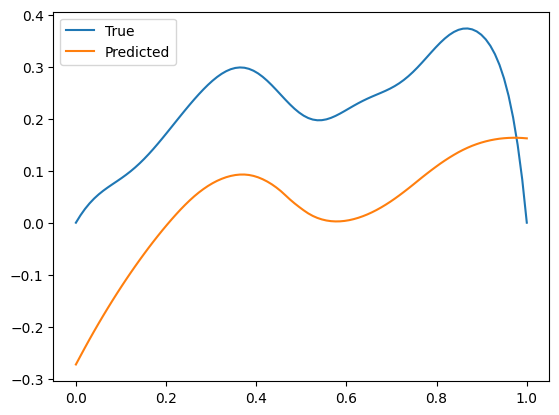

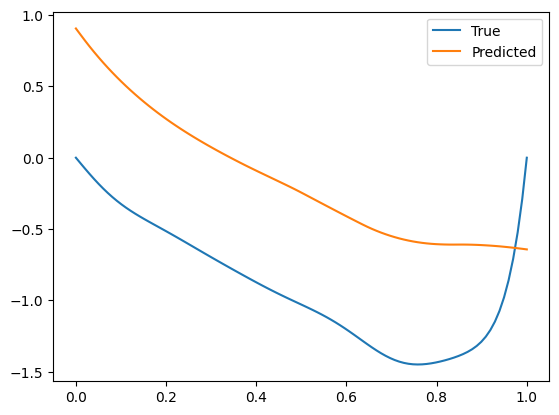

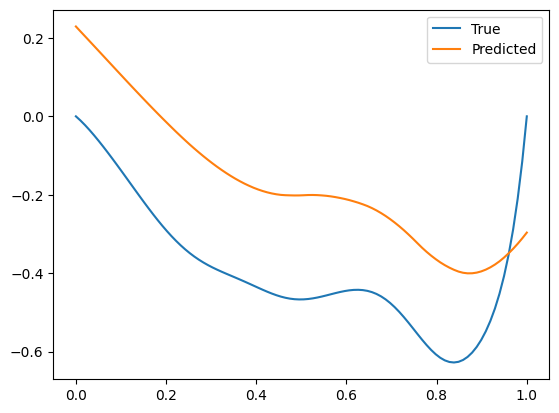

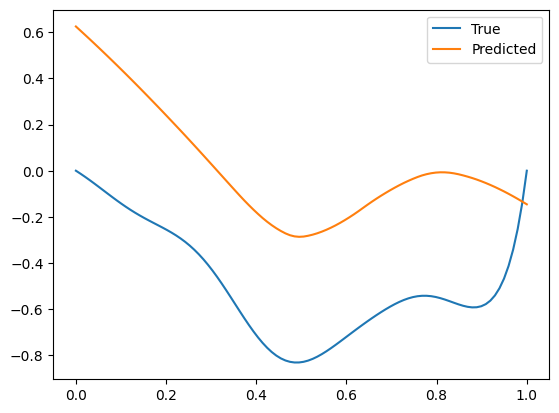

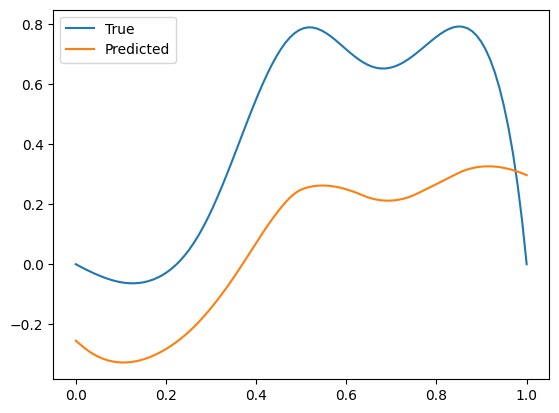

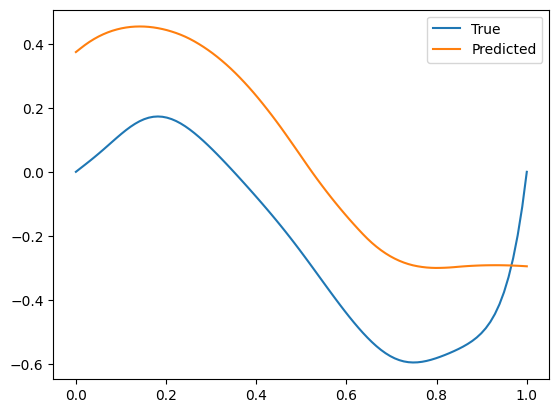

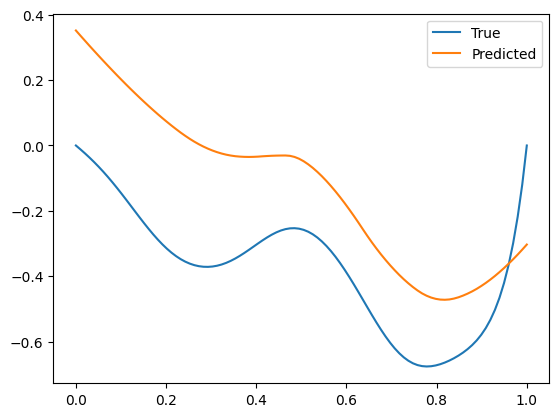

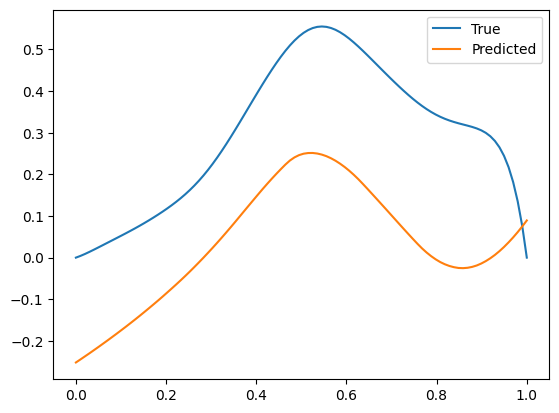

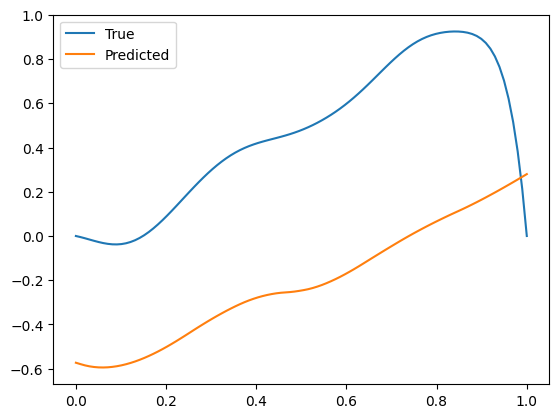

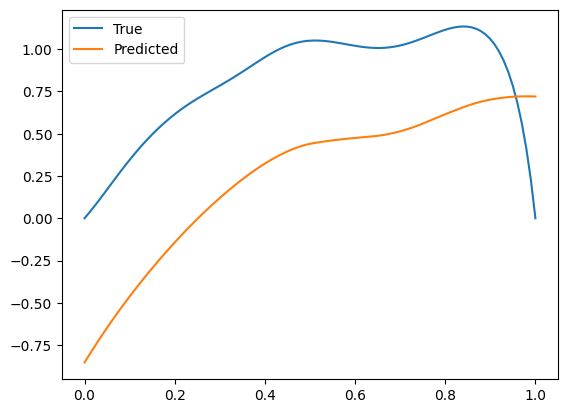

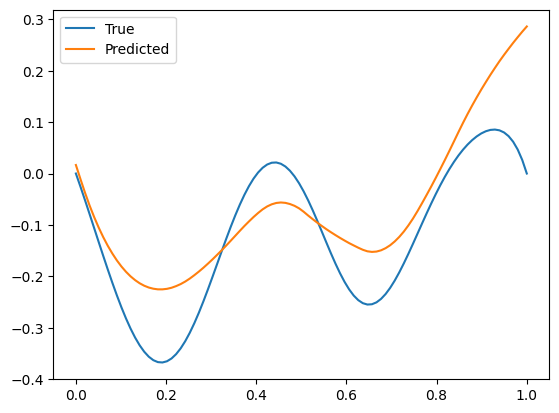

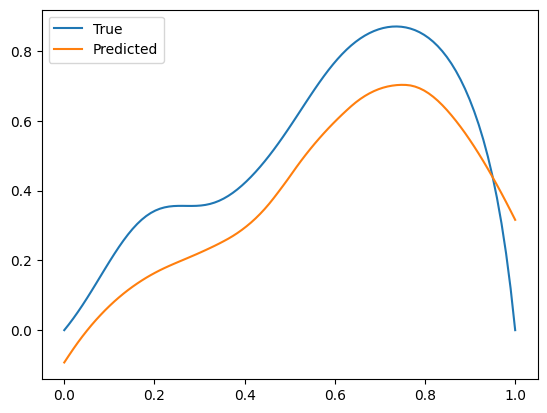

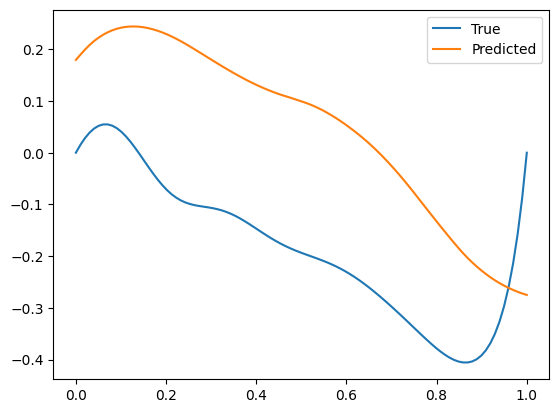

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:23:02,202 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:23:02,203 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.013483
2025-08-05 20:23:02,204 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.012501
Training progress:  10%|█         | 1/10 [00:03<00:31,  3.49s/it]2025-08-05 20:23:05,407 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:23:05,408 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.011458
2025-08-05 20:23:05,409 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.012327
Training progress:  20%|██        | 2/10 [00:06<00:26,  3.32s/it]2025-08-05 20:23:08,767 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-05 20:23:08,768 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.012024
2025-08-05 20:23:08,769 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.013335
Training progress:  30%|███       | 3/10 [00:10<00:23,  3.34s/i

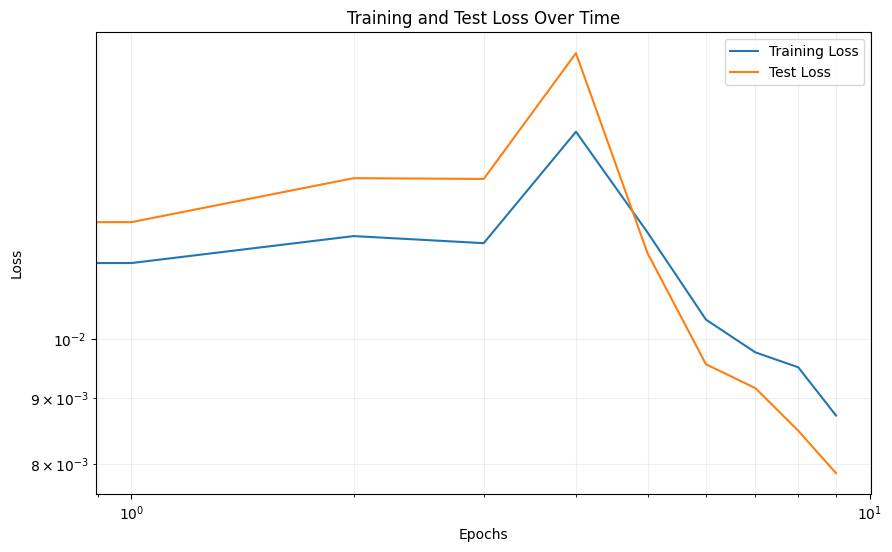

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


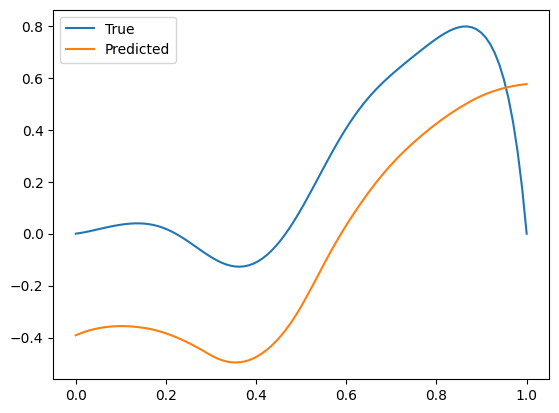

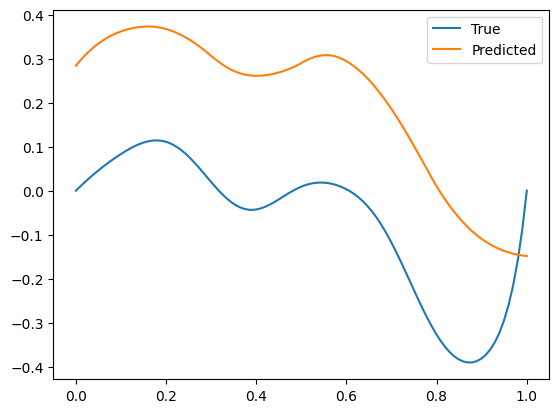

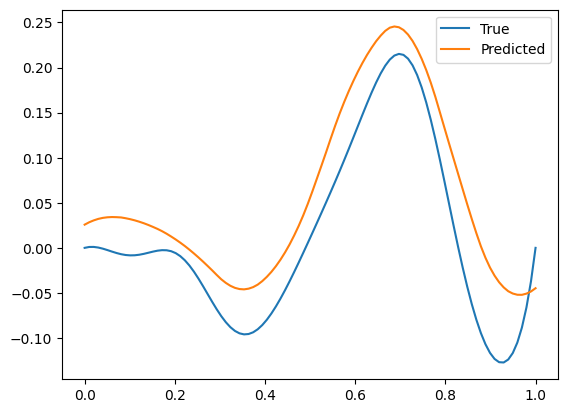

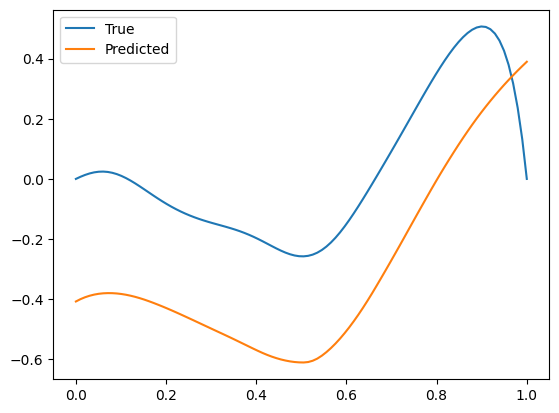

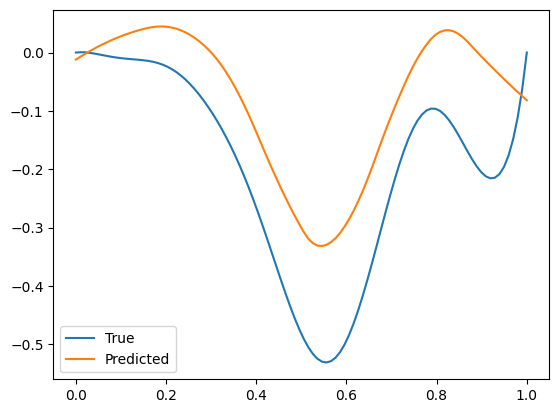

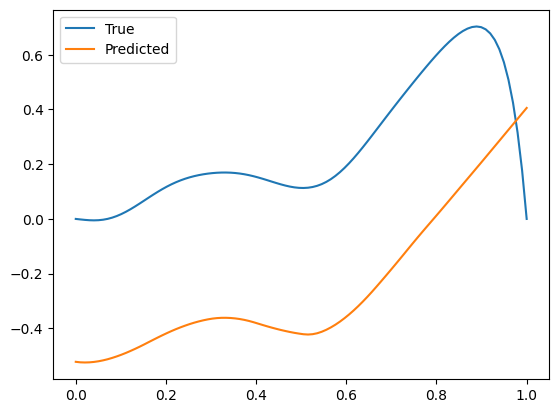

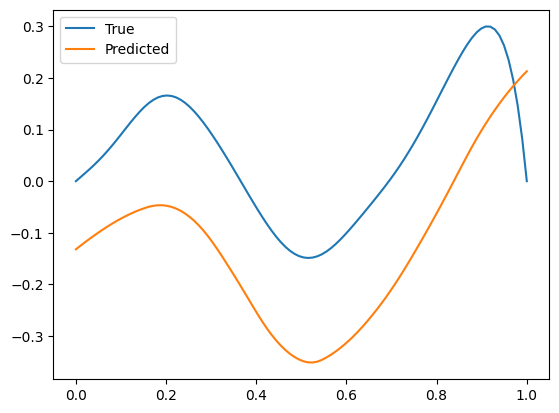

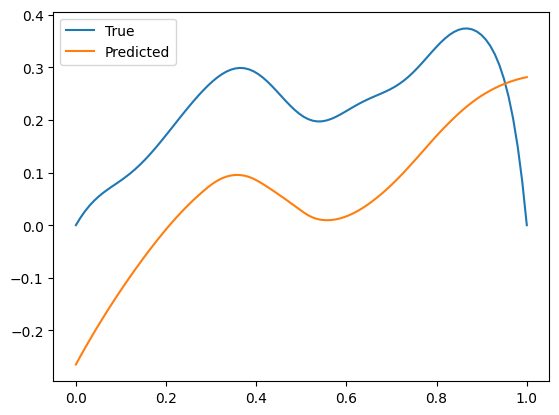

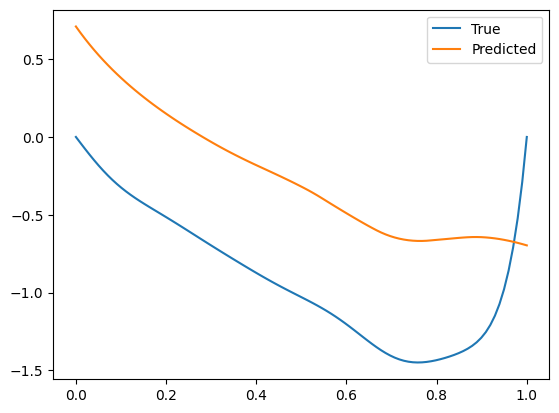

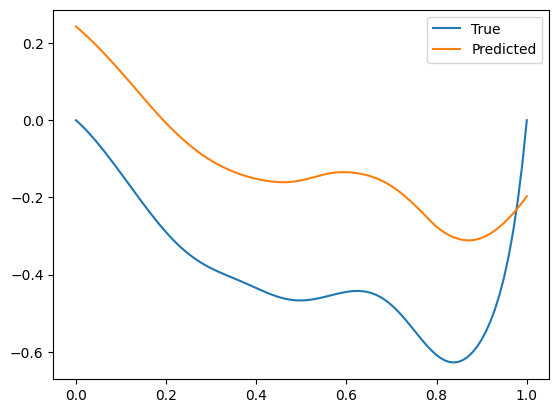

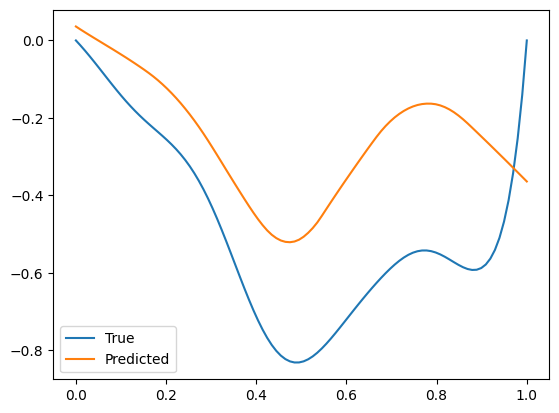

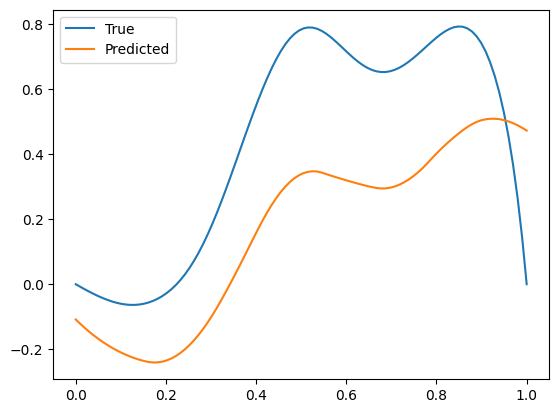

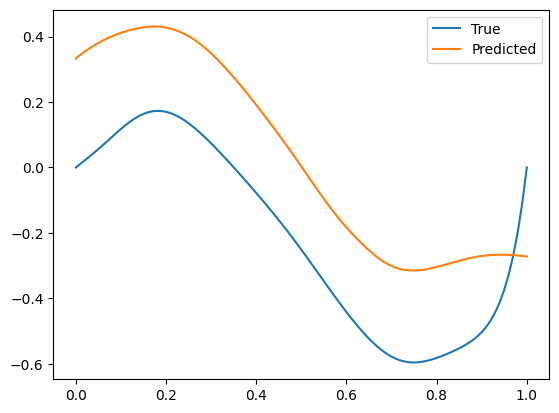

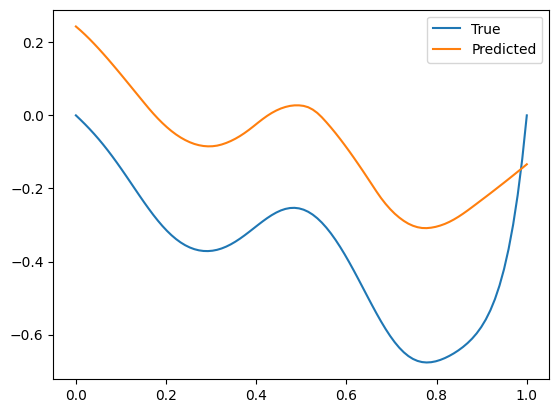

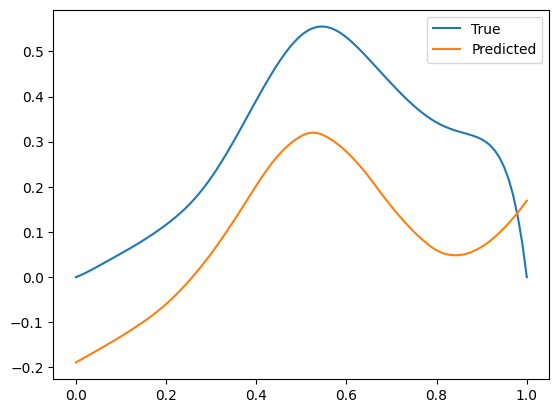

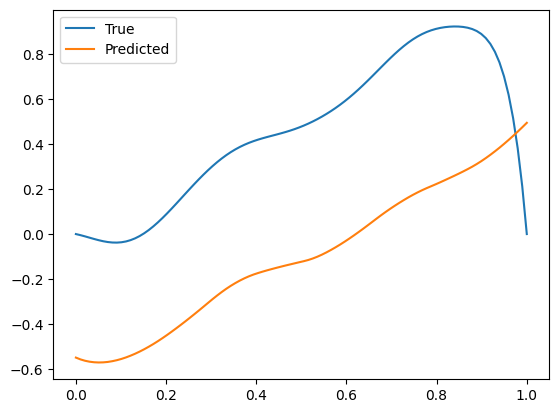

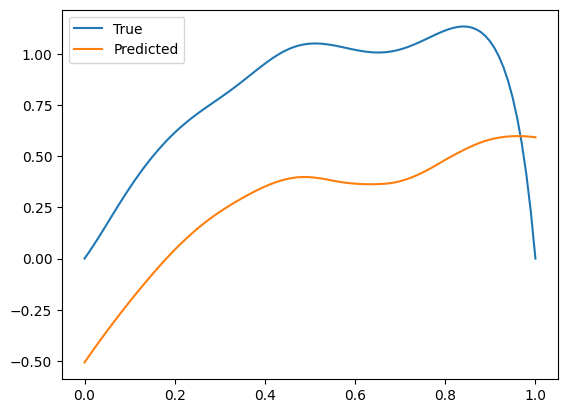

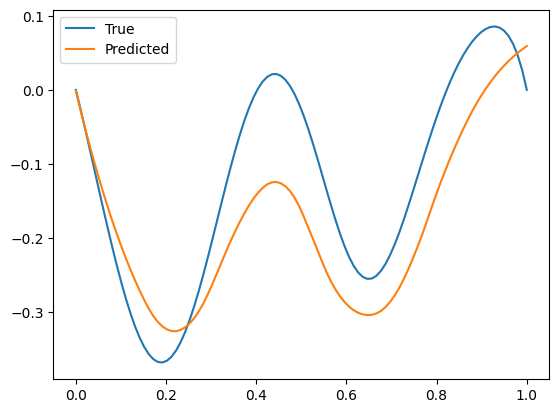

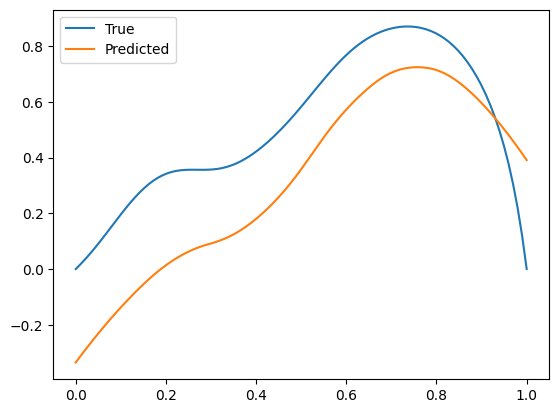

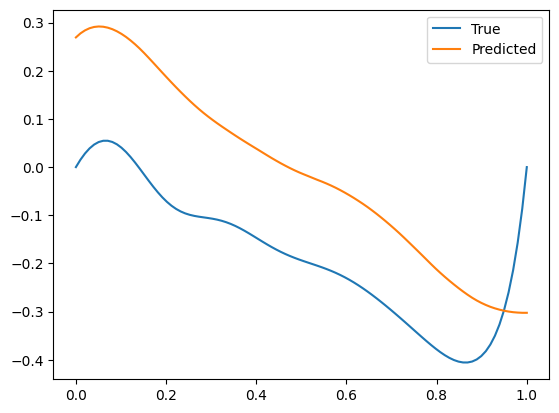

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:23:40,689 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:23:40,691 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.008499
2025-08-05 20:23:40,693 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.007406
Training progress:  10%|█         | 1/10 [00:03<00:33,  3.71s/it]2025-08-05 20:23:43,921 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:23:43,923 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.007887
2025-08-05 20:23:43,923 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.007155
Training progress:  20%|██        | 2/10 [00:06<00:27,  3.43s/it]2025-08-05 20:23:48,341 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-05 20:23:48,342 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.007788
2025-08-05 20:23:48,343 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.007428
Training progress:  30%|███       | 3/10 [00:11<00:27,  3.88s/i

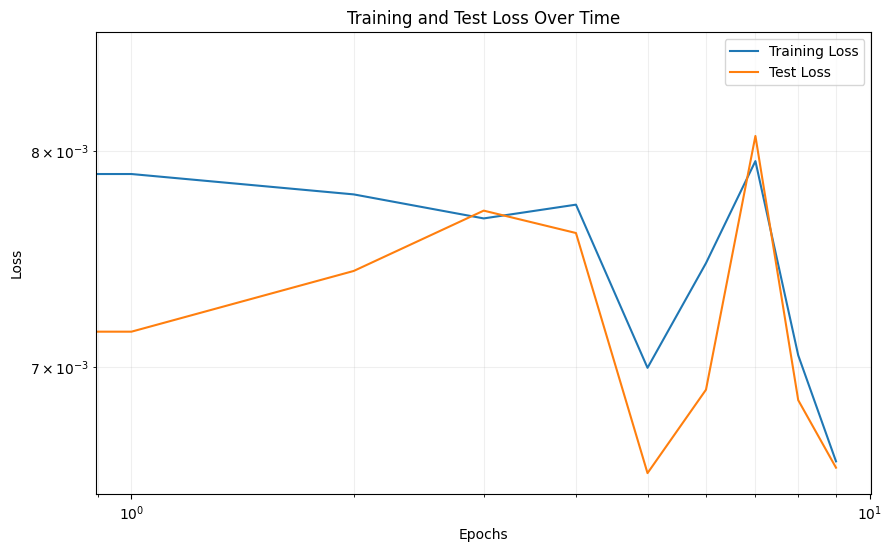

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


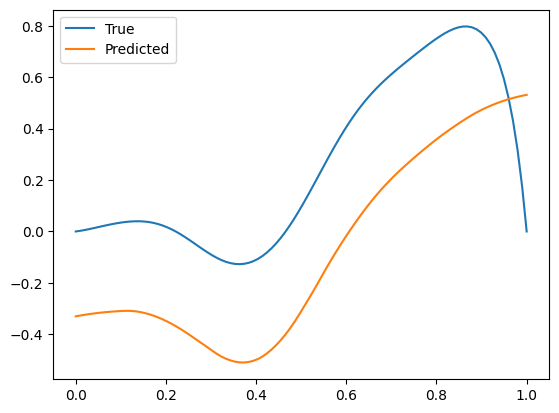

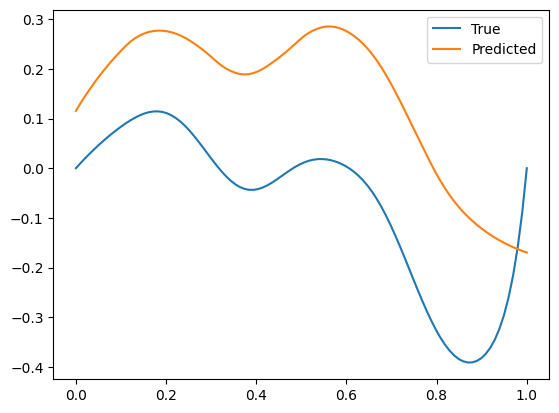

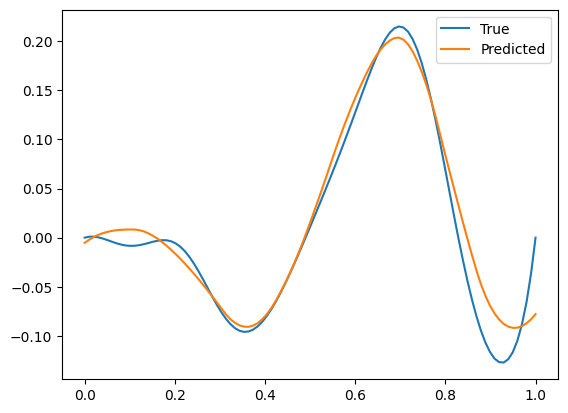

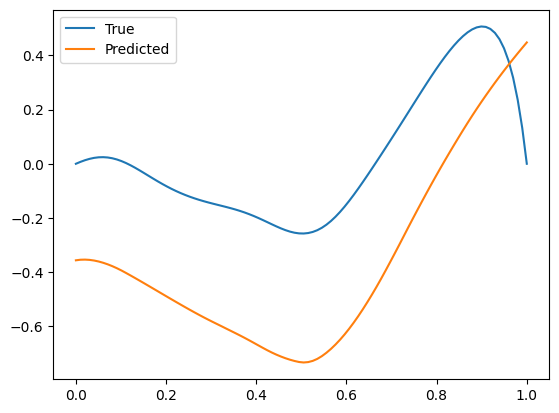

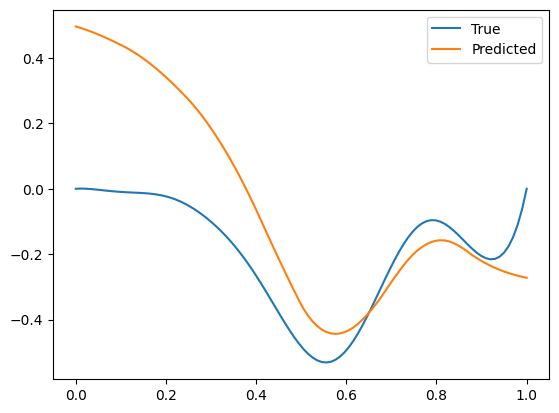

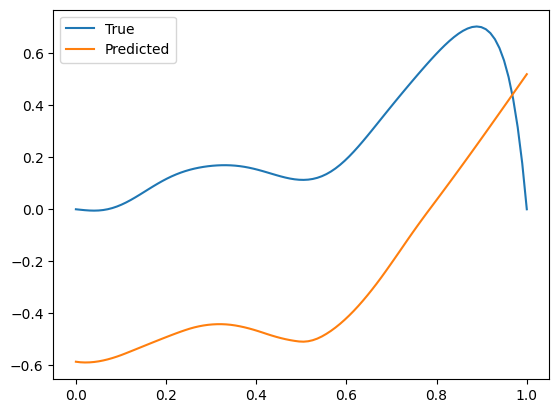

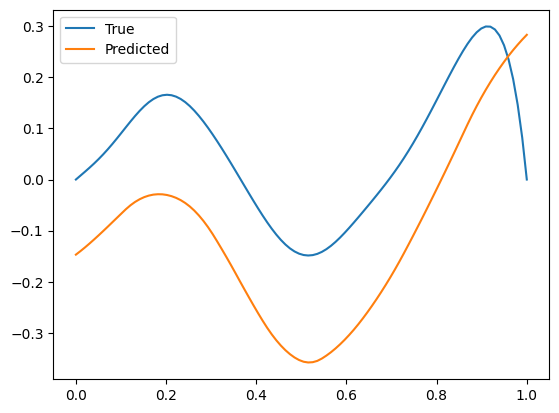

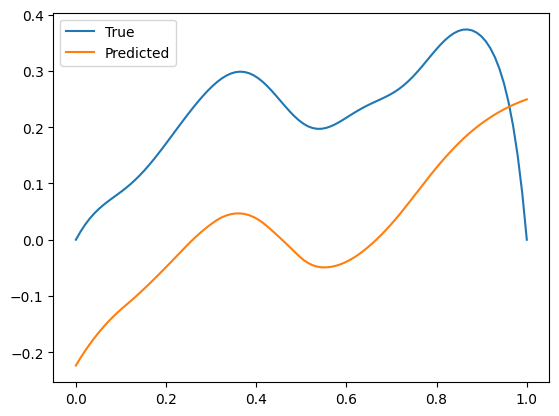

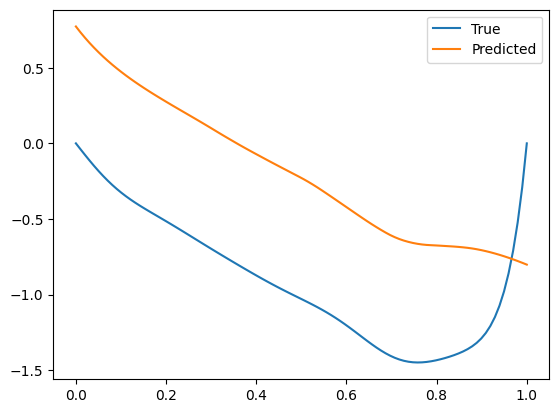

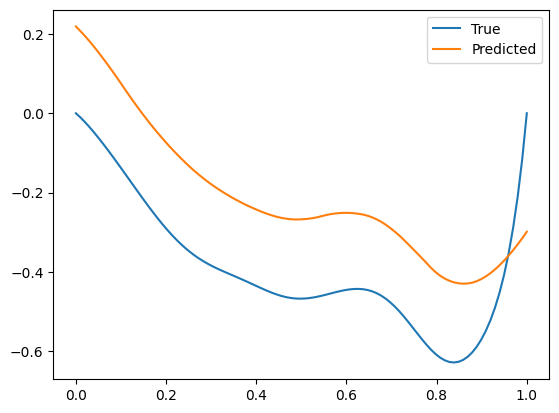

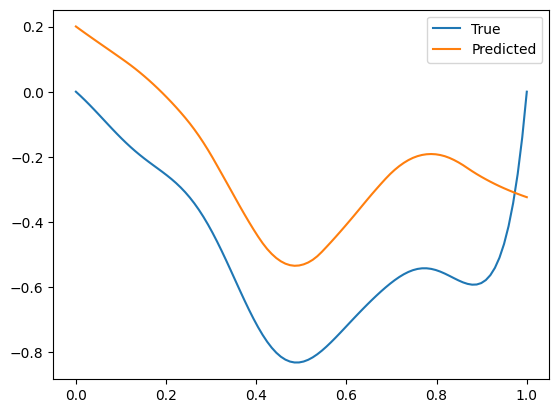

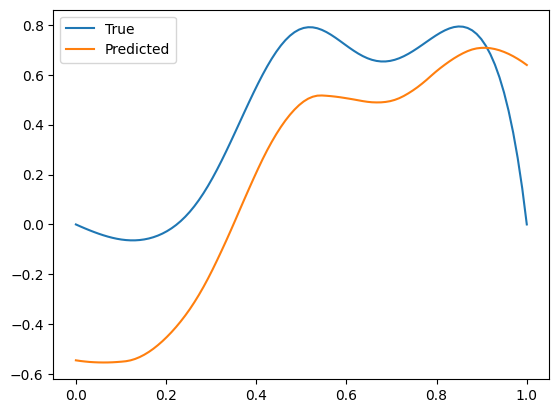

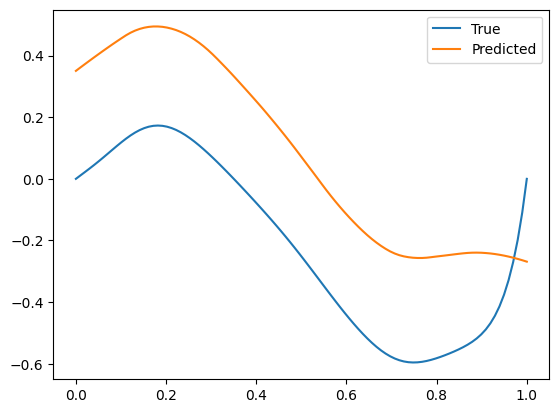

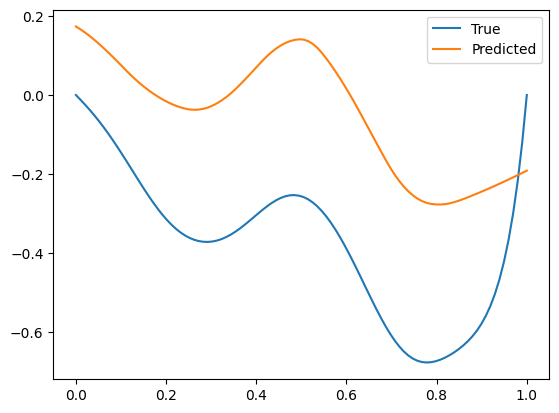

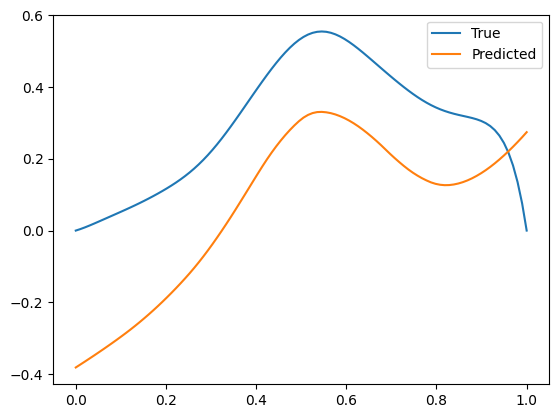

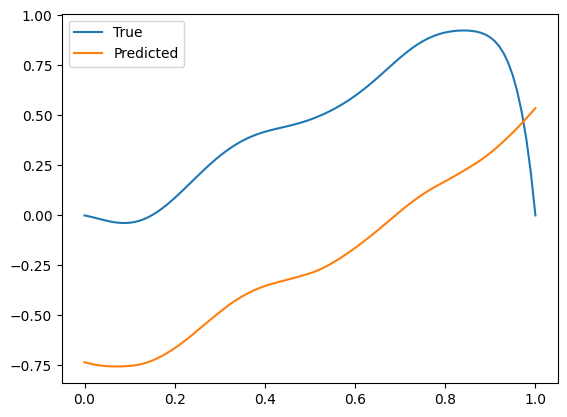

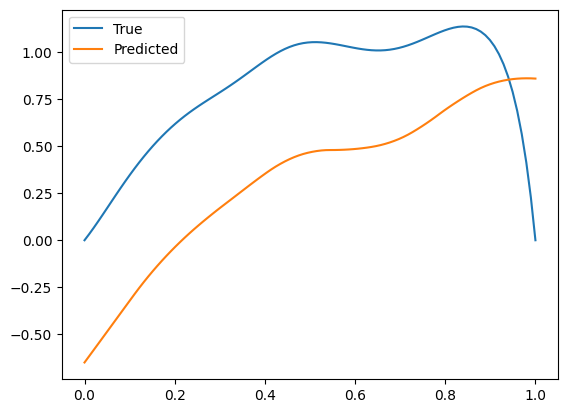

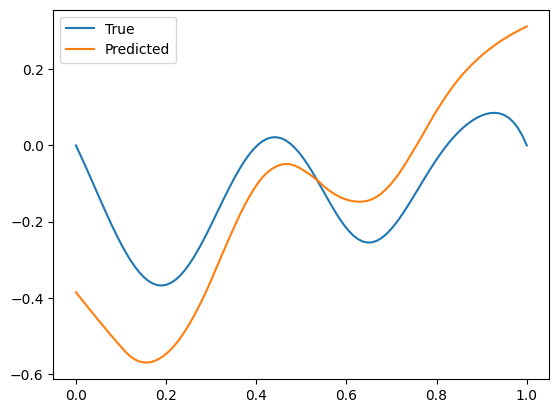

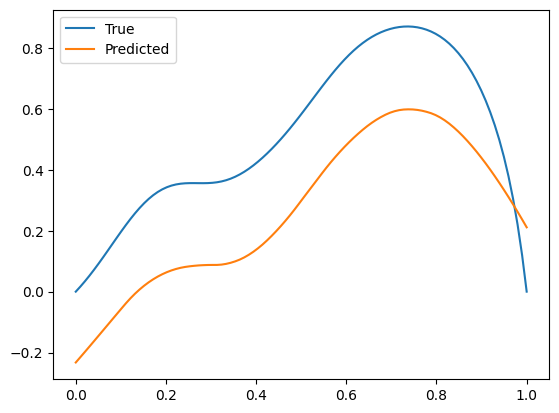

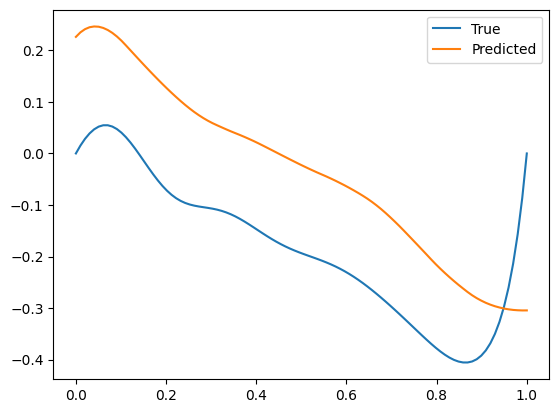

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:24:21,740 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:24:21,741 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.006584
2025-08-05 20:24:21,742 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.008057
Training progress:  10%|█         | 1/10 [00:03<00:31,  3.55s/it]2025-08-05 20:24:24,253 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:24:24,254 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.006950
2025-08-05 20:24:24,254 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.007054
Training progress:  20%|██        | 2/10 [00:06<00:23,  2.94s/it]2025-08-05 20:24:27,385 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-05 20:24:27,387 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.006375
2025-08-05 20:24:27,388 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.006871
Training progress:  30%|███       | 3/10 [00:09<00:21,  3.03s/i

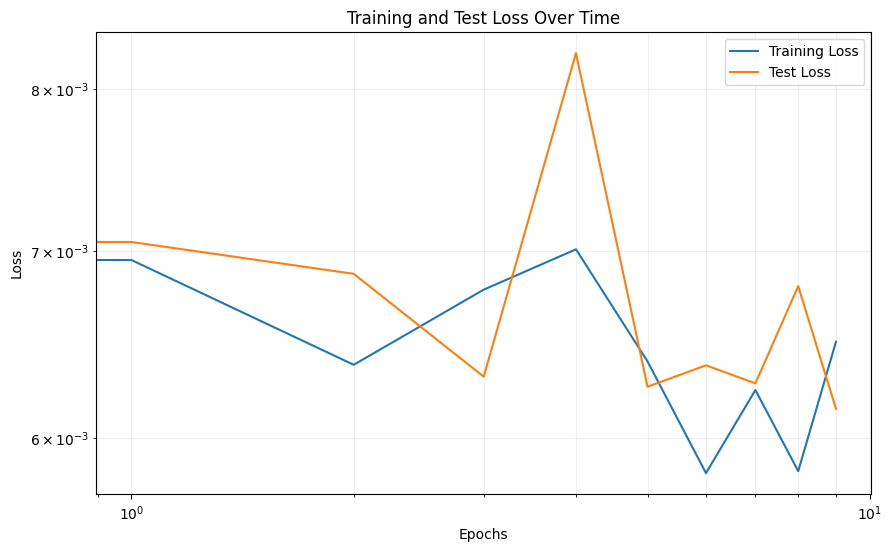

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


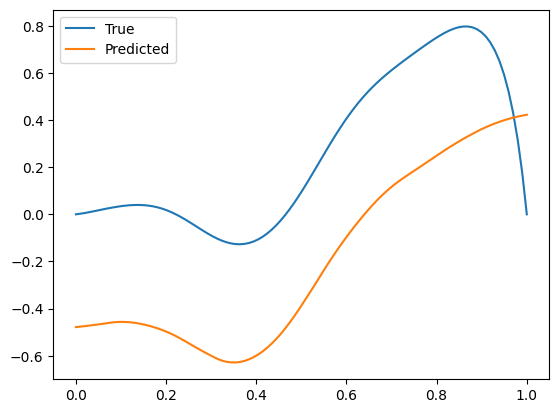

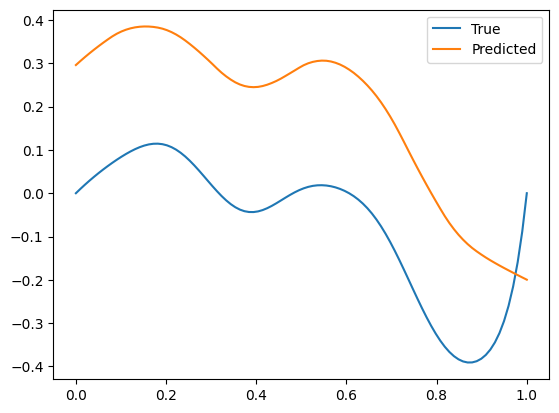

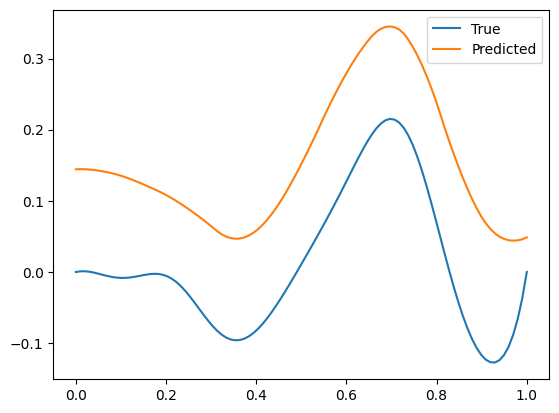

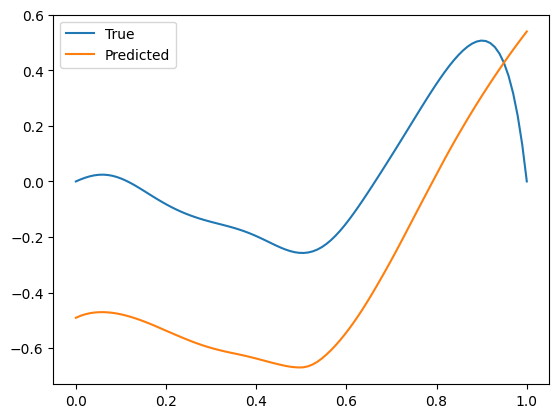

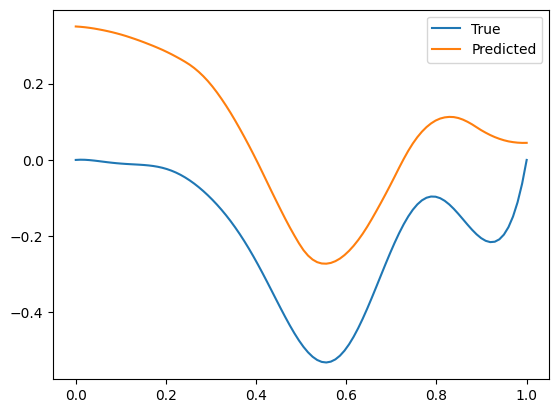

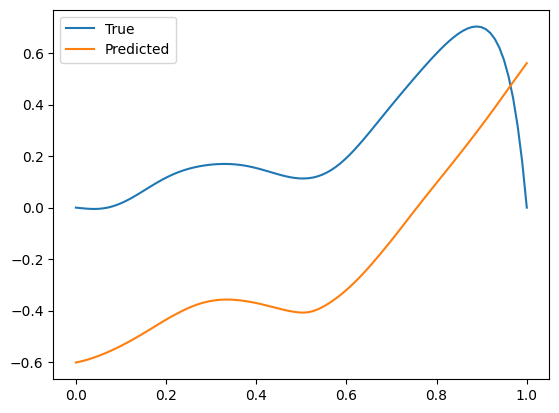

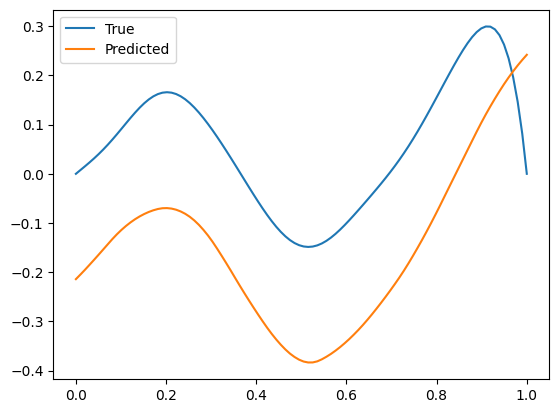

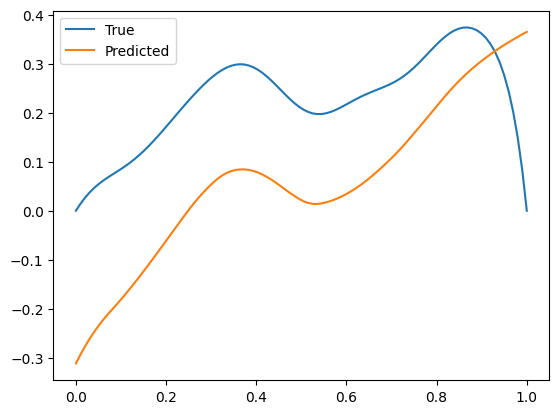

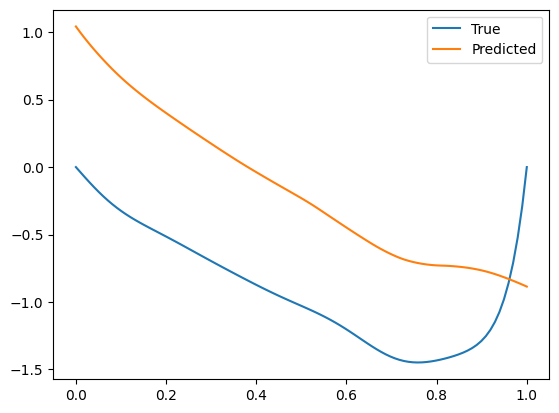

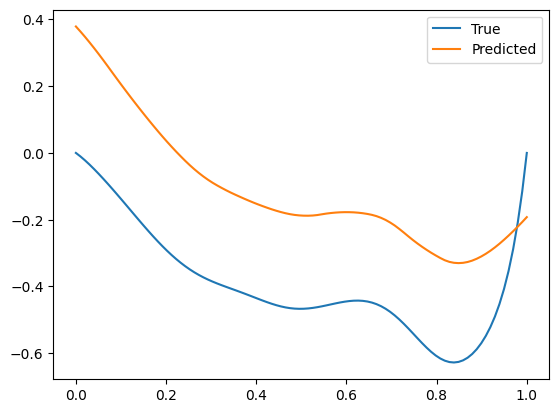

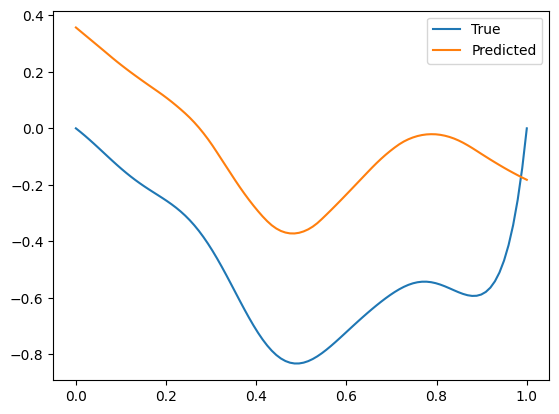

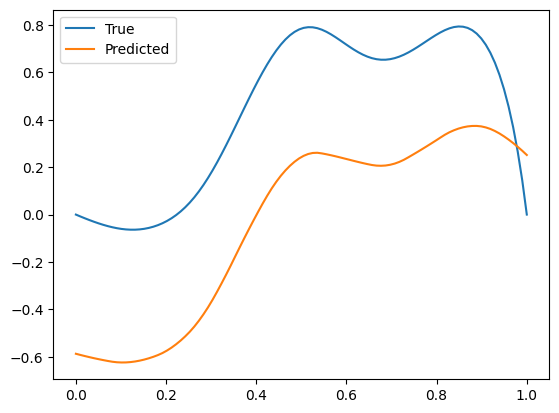

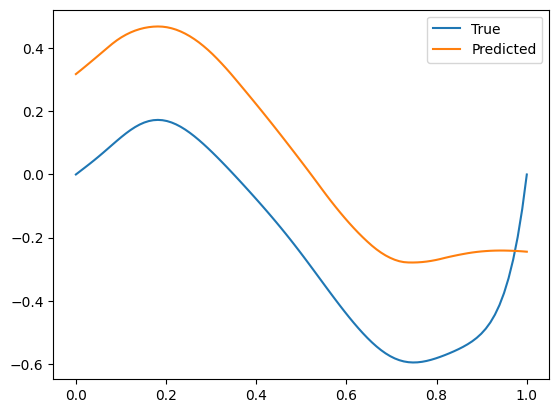

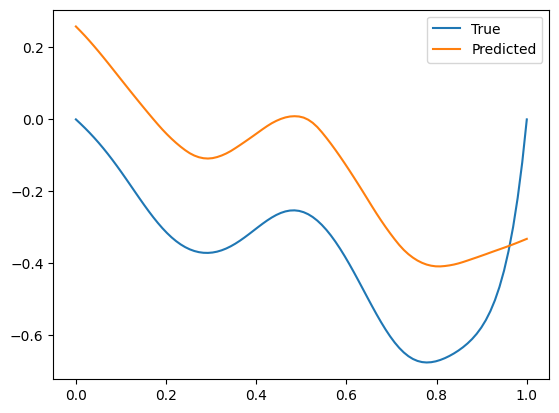

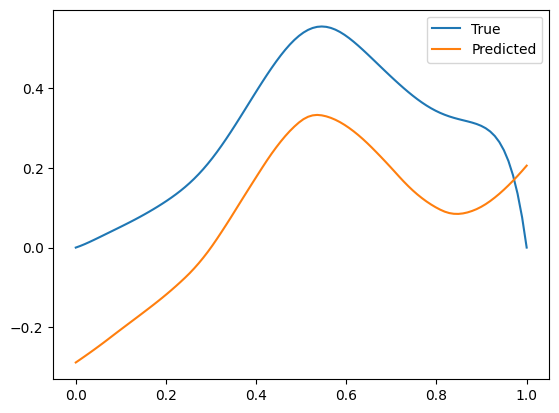

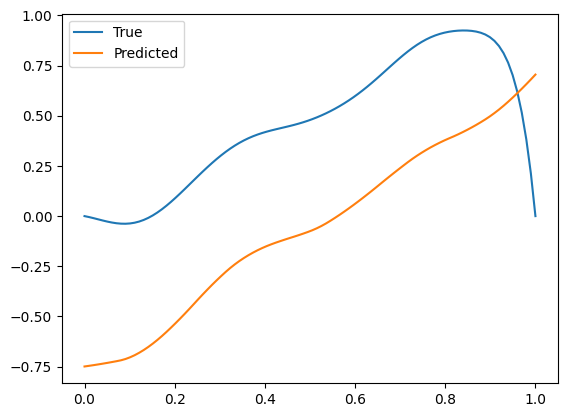

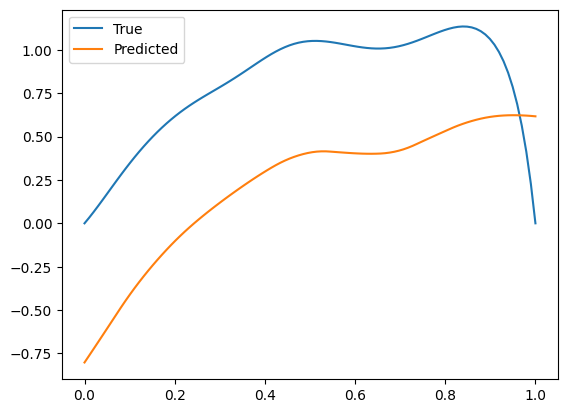

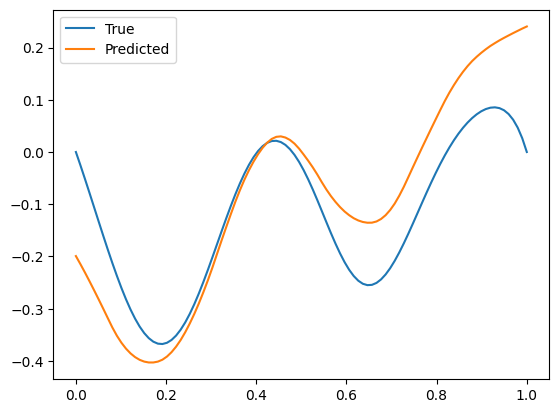

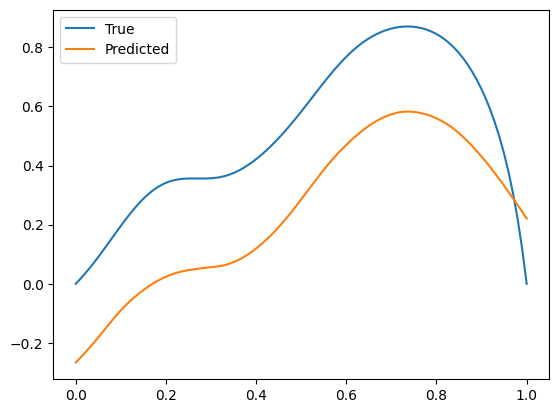

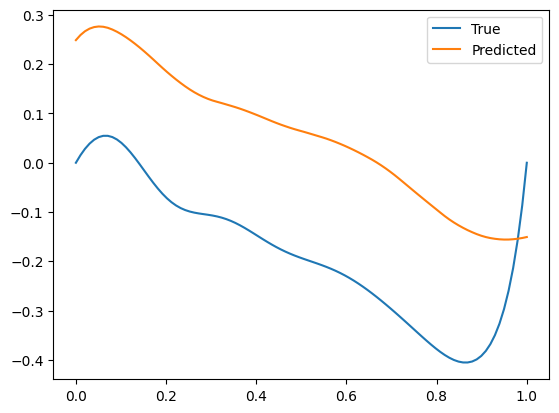

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:25:01,279 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:25:01,280 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.005780
2025-08-05 20:25:01,281 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.006046
Training progress:  10%|█         | 1/10 [00:03<00:31,  3.48s/it]2025-08-05 20:25:04,423 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:25:04,424 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.005197
2025-08-05 20:25:04,425 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.005548
Training progress:  20%|██        | 2/10 [00:06<00:26,  3.28s/it]2025-08-05 20:25:07,579 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-05 20:25:07,580 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.005433
2025-08-05 20:25:07,581 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.005903
Training progress:  30%|███       | 3/10 [00:09<00:22,  3.23s/i

KeyboardInterrupt: 

In [37]:
for _ in range(10):
    train_history = model.fit()
    plt.figure(figsize=(10,6))
    plt.plot(train_history[0], label='Training Loss')  # we plot training loss
    plt.plot(train_history[1], label='Test Loss')  # we plot test loss
    plt.yscale('log')  # we use log scale for better visualization
    plt.grid(True, which="both", ls="-", alpha=0.2)  # we add grid with transparency
    plt.xlabel('Epochs')  # we add x label
    plt.ylabel('Loss')  # we add y label
    plt.title('Training and Test Loss Over Time')  # we add title
    plt.legend()  # we add legend
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
        
        # then we can test the model
    mu_test, xs_test, sol_test = get_mu_xs_sol(folder_path,0.2,training=False)

    preds = model.predict(mu_test, xs_test)
    for i in range(20):
        plt.plot(xs_test[i,:],sol_test[i,:], label='True')
        plt.plot(xs_test[i,:],preds[i,:], label='Predicted')
        plt.legend()
        plt.show()

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


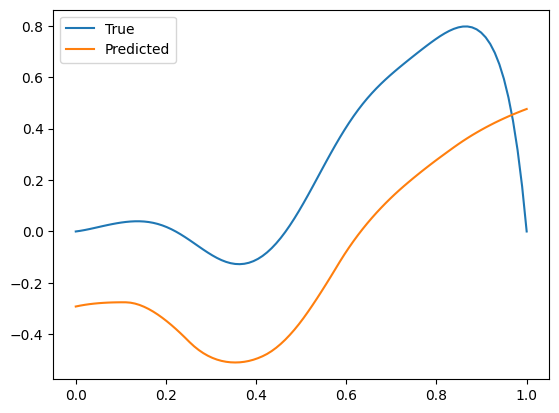

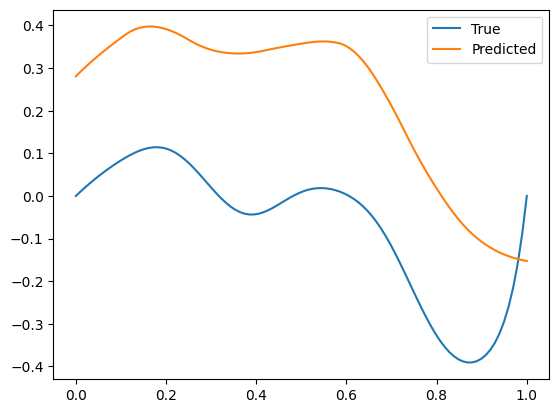

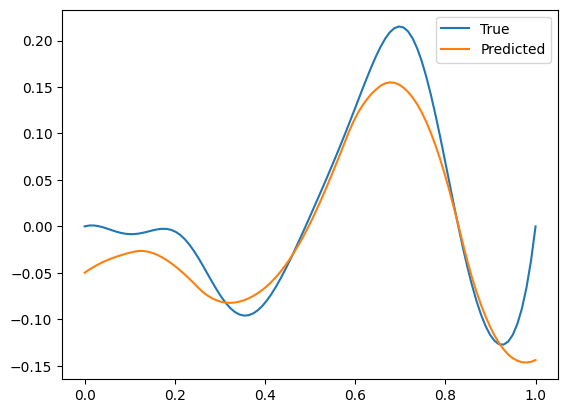

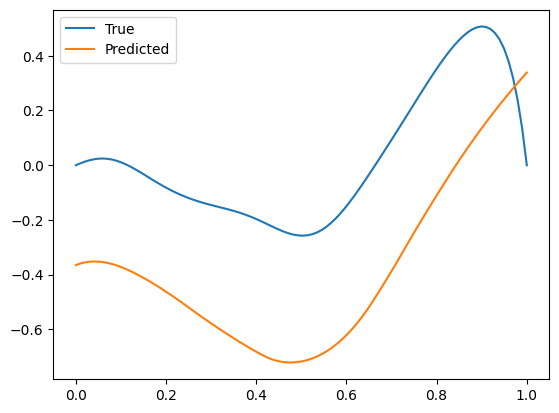

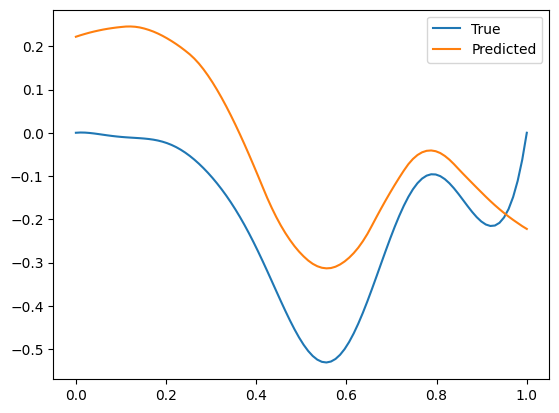

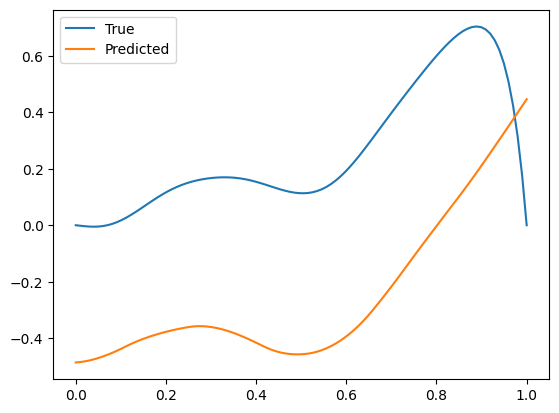

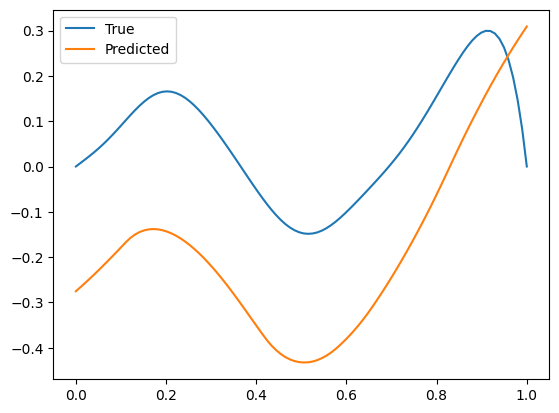

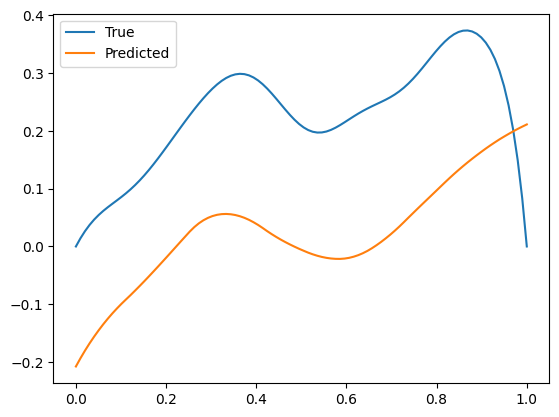

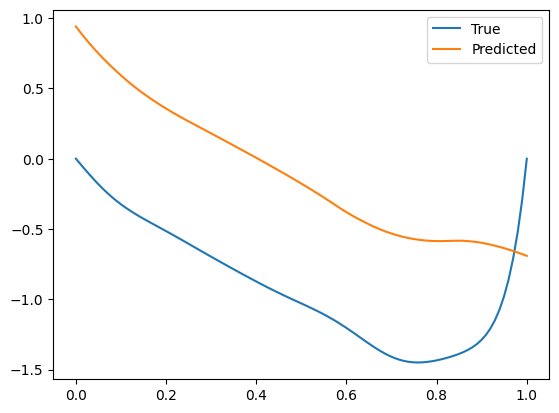

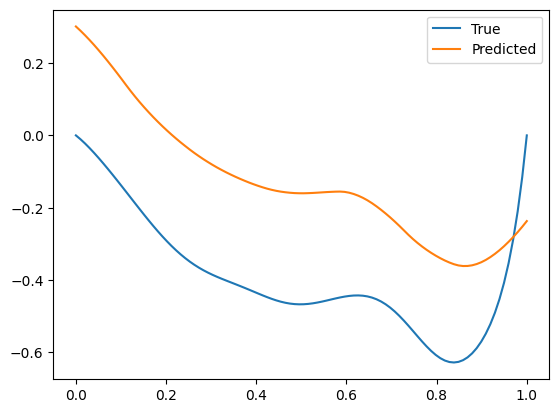

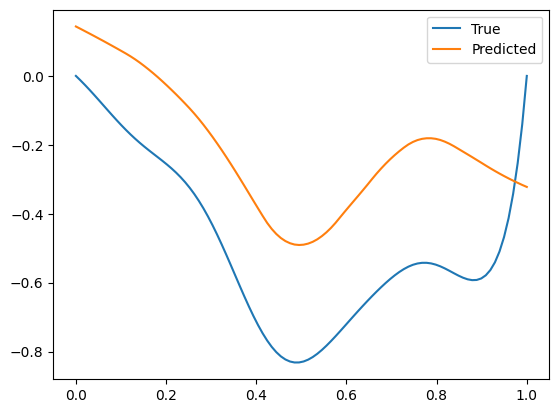

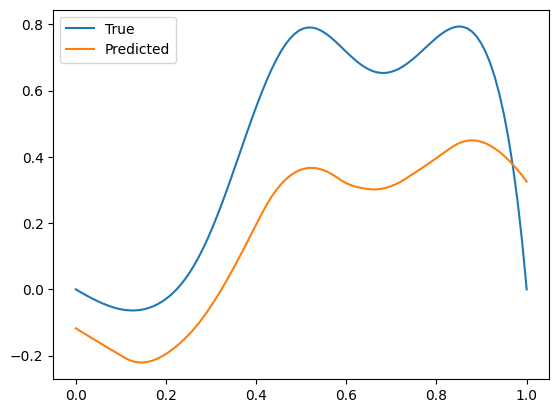

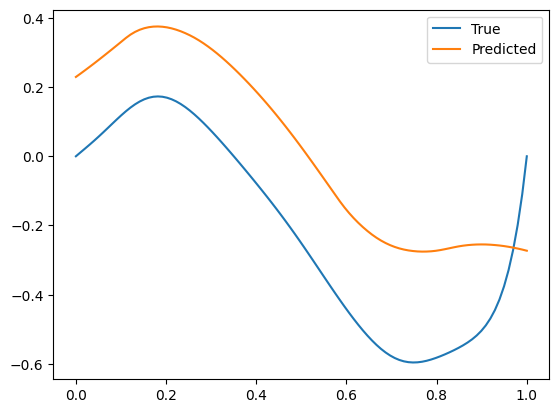

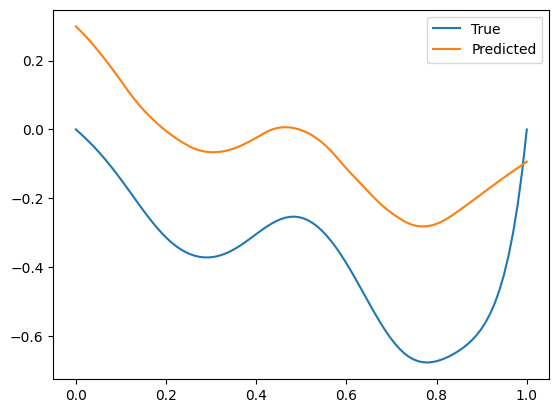

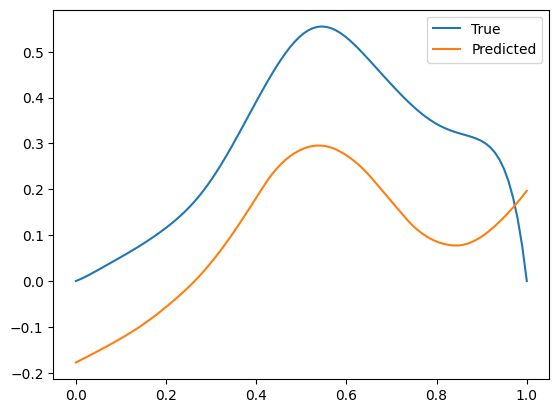

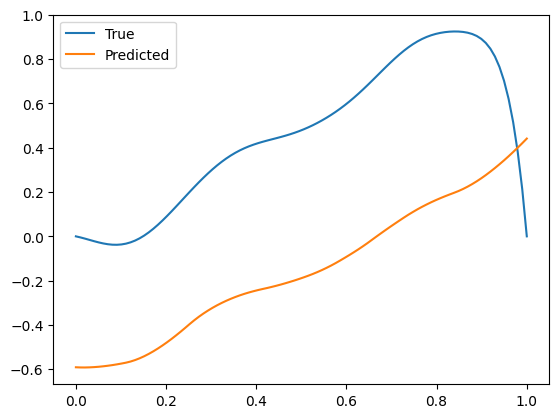

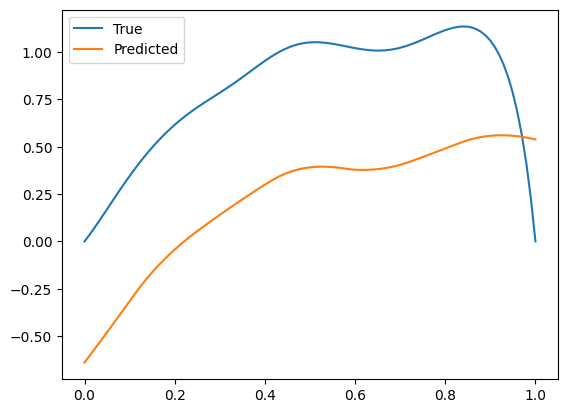

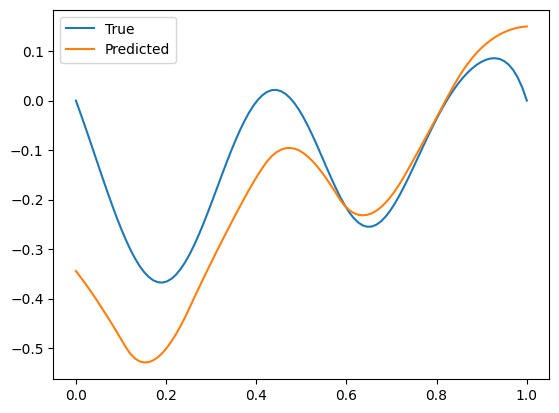

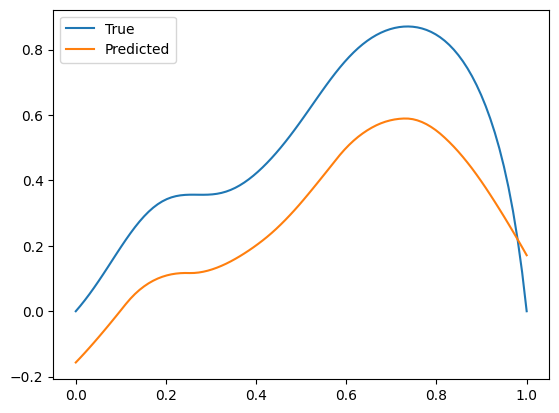

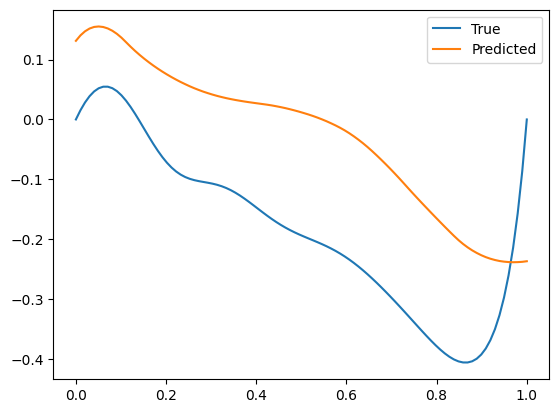

In [ ]:
# then we can test the model
mu_test, xs_test, sol_test = get_mu_xs_sol(folder_path,0.2,training=False)

preds = model.predict(mu_test, xs_test)
for i in range(20):
    plt.plot(xs_test[i,:],sol_test[i,:], label='True')
    plt.plot(xs_test[i,:],preds[i,:], label='Predicted')
    plt.legend()
    plt.show()